# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with estimating probabilities and using Bayes Theorem within a Jupyter notebook.  The questions coloured green are important practice for CA.

Before attempting these examples, please ensure you have read through [Chapter 4 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter4/Chapter4.ipynb) and have completed the Learning Central **Chapter 4 quiz**. 

These are good practice for CA 1 Question 5.

***

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


# Errors

## Question 

Three students measure the same resistance several times, with final measurements (in Ohms):

Student 1: $R = 11 \pm 1$
Student 2: $R = 12 \pm 1$
Student 3: $R = 10 \pm 3$.

Given these three results what do we write down as the best estimate for the resistance $R$? Tip: you will need to use weighted errors.

### Answer

In [20]:
data = np.array([[11,12,10], [1,1,3]])

print(f"unweighted mean = {np.mean(data[0]):.2f} ± {np.mean(data[1]):.2f}")

print(f"weighted mean = {np.average(data[0], weights=data[1]):.2f} ± {np.sqrt(np.cov(data[0], aweights=data[1])):.2f}")



unweighted mean = 11.00 ± 1.67
weighted mean = 10.60 ± 1.07


***

# Correlation

## <font color=#30a64d>Question </font>

The datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter4/worldpopulation.txt) contains the world population size measured since 1960. Plot the data (you will need to upload the datafile to your Google Colab). <br><br>

Measure the correlation coefficient using the in built Python package for the Pearson $r$s statistic. <br><br>

Measure it again but this time creating the functions to calculate $r$ from scratch.  

### Answer

In [21]:
!wget https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/blended_exercises/Chapter4/worldpopulation.txt

--2022-10-24 10:38:52--  https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/blended_exercises/Chapter4/worldpopulation.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2950 (2.9K) [text/plain]
Saving to: ‘worldpopulation.txt’

worldpopulation.txt 100%[===================>]   2.88K  --.-KB/s    in 0s      

2022-10-24 10:38:52 (40.2 MB/s) - ‘worldpopulation.txt’ saved [2950/2950]



Text(0, 0.5, 'Population')

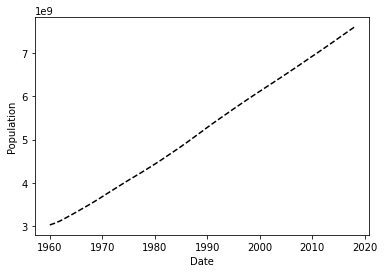

In [34]:
population = np.loadtxt("/content/worldpopulation.txt")

plt.plot(*population, "k--") #the * operator splits px in x[0], x[1]
plt.xlabel("Date")
plt.ylabel("Population")

In [39]:
corr, _ = stats.pearsonr(*population) 
print(f"Pearsons correlation = {corr:.4f}")

Pearsons correlation = 0.9996


In [41]:
def pearsonr_homebrew(x,y):
  o_xy = np.sum((x-np.mean(x))*(y-np.mean(y)))
  o_x = np.sum((x-np.mean(x))**2)
  o_y = np.sum((y-np.mean(y))**2)

  return o_xy/np.sqrt(o_x * o_y)


corr = pearsonr_homebrew(*population)
print(f"Pearsons correlation = {corr:.4f}")

Pearsons correlation = 0.9996


***

# Hypothesis Testing

## <font color=#30a64d>Question</font>

A company releases a new ski wax that it claims (naturally) is superior to its rivals, and greatly reduces the friction between skis and snow. A skiing magazine decides to test the claim by performing an experiment. They take 10 pairs of skis, and treat one ski from each pair -- the left one -- with the new wax, and the other (the right) ski with the wax from a competing brand. Each pair of skis are then released from the top of a ramp in turn, and they record which of the two skis reach the bottom of the ramp first.    The team find that the new skis win 8 of the 10 races.  Is their claim correct?

### Answer

$H_0$ in this case is that the new ski wax is no more likely to win than the old ski wax, therefore $P = 0.5$

The number of trials $N = 10$, so we use the binomial to calculate the probablitiy of getting 8 successes with a probability of 0.5

We will take a significance level of 5%


In [42]:
r = 8
n = 10
p = 0.5
stats.binom.pmf(r, n, p)

0.04394531250000004

***